In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X = df.drop(['Outcome'],axis = 1)
y = df['Outcome']

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
inputs = keras.Input(shape = (X.shape[1],))
# x = layers.BatchNormalization()(inputs)
x = layers.Dense(64,activation = 'relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dense(128,activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128,activation = 'relu')(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(2,activation = 'softmax')(x)
model = keras.Model(inputs = inputs,outputs = outputs)
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"],
)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .25,random_state = 123)

In [19]:
model.fit(x_train,y_train,batch_size = 32,epochs = 10,verbose = 2)
model.evaluate(x_test,y_test,batch_size = 32,verbose  =2)

Epoch 1/10
18/18 - 4s - loss: 0.7777 - accuracy: 0.6545 - 4s/epoch - 229ms/step
Epoch 2/10
18/18 - 0s - loss: 0.5305 - accuracy: 0.7517 - 88ms/epoch - 5ms/step
Epoch 3/10
18/18 - 0s - loss: 0.4226 - accuracy: 0.7934 - 122ms/epoch - 7ms/step
Epoch 4/10
18/18 - 0s - loss: 0.3999 - accuracy: 0.8368 - 126ms/epoch - 7ms/step
Epoch 5/10
18/18 - 0s - loss: 0.3594 - accuracy: 0.8368 - 212ms/epoch - 12ms/step
Epoch 6/10
18/18 - 0s - loss: 0.3409 - accuracy: 0.8611 - 192ms/epoch - 11ms/step
Epoch 7/10
18/18 - 0s - loss: 0.3282 - accuracy: 0.8646 - 124ms/epoch - 7ms/step
Epoch 8/10
18/18 - 0s - loss: 0.2972 - accuracy: 0.8854 - 161ms/epoch - 9ms/step
Epoch 9/10
18/18 - 0s - loss: 0.2724 - accuracy: 0.8924 - 162ms/epoch - 9ms/step
Epoch 10/10
18/18 - 0s - loss: 0.2923 - accuracy: 0.8872 - 160ms/epoch - 9ms/step
6/6 - 1s - loss: 0.6159 - accuracy: 0.6771 - 906ms/epoch - 151ms/step


[0.6159119009971619, 0.6770833134651184]

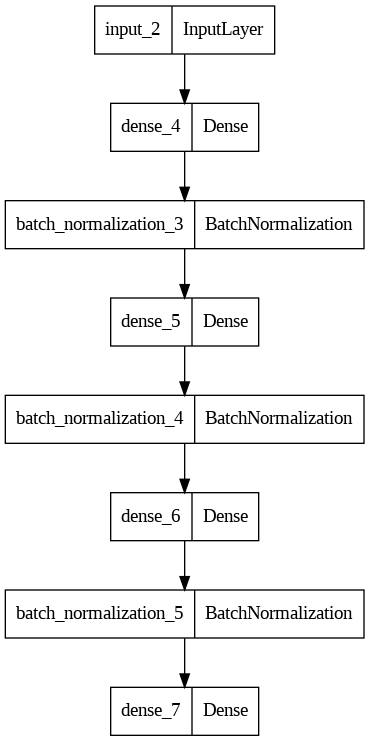

In [17]:
from keras.utils import plot_model
plot_model(model)

**Functional API**

In [20]:
inputs = keras.Input(shape=(X.shape[1],))

# Model architecture
x = layers.Dense(64, activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)

# Output layer for regression
outputs = layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with an appropriate loss function for regression
model.compile(
    loss = 'binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"],
)

# Training the model
model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Evaluate the model
model.evaluate(x_test, y_test,batch_size = 32,verbose = 2)


Epoch 1/10
15/15 [==============================] - 7s 47ms/step - loss: 4.2600 - accuracy: 0.6587 - val_loss: 0.5803 - val_accuracy: 0.7328
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 3.8778 - accuracy: 0.6978 - val_loss: 1.3832 - val_accuracy: 0.7155
Epoch 3/10
15/15 [==============================] - 0s 16ms/step - loss: 3.6913 - accuracy: 0.7261 - val_loss: 1.8229 - val_accuracy: 0.6983
Epoch 4/10
15/15 [==============================] - 0s 13ms/step - loss: 3.5571 - accuracy: 0.7261 - val_loss: 1.9117 - val_accuracy: 0.7328
Epoch 5/10
15/15 [==============================] - 0s 11ms/step - loss: 3.7711 - accuracy: 0.7239 - val_loss: 2.3720 - val_accuracy: 0.7500
Epoch 6/10
15/15 [==============================] - 0s 17ms/step - loss: 3.4800 - accuracy: 0.7413 - val_loss: 2.4752 - val_accuracy: 0.7500
Epoch 7/10
15/15 [==============================] - 0s 12ms/step - loss: 3.5542 - accuracy: 0.7196 - val_loss: 2.2789 - val_accuracy: 0.7414
Epoch 8/10
15

[3.5453481674194336, 0.6979166865348816]

In [30]:
data = pd.read_csv('/content/diabetes.csv')
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Sequential API**

In [28]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/50
18/18 [==============================] - 1s 14ms/step - loss: 0.6405 - accuracy: 0.6406 - val_loss: 0.6056 - val_accuracy: 0.6927
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5602 - accuracy: 0.7135 - val_loss: 0.5353 - val_accuracy: 0.7708
Epoch 3/50
18/18 [==============================] - 0s 6ms/step - loss: 0.5077 - accuracy: 0.7517 - val_loss: 0.5015 - val_accuracy: 0.8073
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4803 - accuracy: 0.7691 - val_loss: 0.4806 - val_accuracy: 0.8177
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4669 - accuracy: 0.7726 - val_loss: 0.4768 - val_accuracy: 0.8125
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4560 - accuracy: 0.7760 - val_loss: 0.4673 - val_accuracy: 0.8125
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4499 - accuracy: 0.7795 - val_loss: 0.4702 - val_accuracy: 0.8021
Epoch 8/50
18/18 [=

In [29]:
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.7500


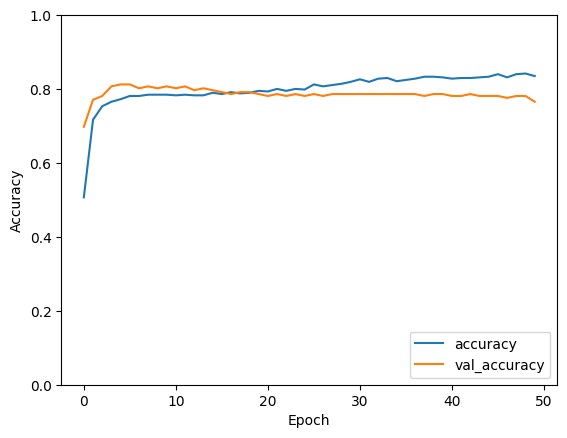

In [27]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()